# Practical session: Naive Bayesian Classifier - Spam emails

Naive Bayesian Classifier calculates the probability of a class given input features, assuming feature independence. It selects the class with the highest probability.

Naive Bayes applies the Bayes' theorem to calculate the probability of a data point belonging to a particular class. Given the probability of certain related values, the formula to calculate the probability of an event $B$, given event $A$ to occur is calculated as follows.

$P(B|A) = (P(A|B) * P(B) / P(A))$

This theory is considered naive, because it assumes that there is no dependency between any of the input features. Even with this not true or naive assumption, the Naive Bayes algorithm has been proven to perform really well in certain use cases like spam filters.

In [1]:
## Importing Libraries 

# Base libraries
import numpy as np
import pandas as pd
import os
import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualisation 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Modelling
from sklearn.naive_bayes import GaussianNB, MultinomialNB

## Default options and global variables
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Dataset

In [2]:
# Set the data path 
DATA_PATH="../data/spam/"
DATA_FILE="spam_email.csv.zip"
print(os.listdir(DATA_PATH))

# read the datafile
df = pd.read_csv(DATA_PATH + DATA_FILE)

['spam_email.csv.zip']


In [3]:
## Quick exploration
# Dataset dimensions
print("dataset:", df.shape[0],"rows,", df.shape[1], "columns")

dataset: 83448 rows, 2 columns


In [4]:
df.head(5)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [5]:
df.tail()

,label,text
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...
83447,1,get the most out of life ! viagra has helped m...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


## Preprocessing

1. The input and output are seperated. 
3. Text processing.
2. The train and test datasets are determined.

In [7]:
# Independent variables / inputs
x = df.loc[:,'text']
# Dependent variable / output
y = df.loc[:,'label'] 
print(x.shape, y.shape)
print(x)


(83448,) (83448,)
0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get your medircations online qnb ikud v...
2         computer connection from cnn com wednesday es...
3        university degree obtain a prosperous future m...
4        thanks for all your answers guys i know i shou...
                               ...                        
83443    hi given a date how do i get the last date of ...
83444    now you can order software on cd or download i...
83445    dear valued member canadianpharmacy provides a...
83446    subscribe change profile contact us long term ...
83447    get the most out of life ! viagra has helped m...
Name: text, Length: 83448, dtype: object


### Text processing

Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data.

In [8]:
## Text processing
# Count Vectorization ( Converting text into features ) -> Count of each word
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)   
print("Features :", len(vectorizer.get_feature_names_out()))

Features : 310813


### Data splitting 

In [9]:
## Split dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(x_train.shape, x_test.shape)

(58413, 310813) (25035, 310813)


In [10]:
# Check stratification
print("Train:\n", y_train.value_counts()/len(y_train))
print("Test:\n", y_test.value_counts()/len(y_test))

Train:
 label
1   0.53
0   0.47
Name: count, dtype: float64
Test:
 label
1   0.53
0   0.47
Name: count, dtype: float64


### Metrics

1. Accuracy: is an evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made.

2. Balanced Accuracy is the average between the sensitivity and the specificity, which measures the average accuracy obtained from both the minority and majority classes.

3. Precision is the ratio of true positives to the sum of true positives and false positives, measuring a classifier's accuracy for positive predictions.

4. Recall, or sensitivity, is the ratio of true positives to the sum of true positives and false negatives, assessing a classifier's ability to capture all positives.

5. Confusion matrix summarizes model performance by showing true positives, true negatives, false positives, and false negatives in classification.

6. Precision-Recall curve visually represents the trade-off between precision and recall at different probability thresholds, assessing a classifier's performance.





In [11]:
def print_performance_metrics(y_test, y_pred, classifier, x_test):
    # metrics info: https://scikit-learn.org/stable/modules/model_evaluation.html
    accuracy = metrics.accuracy_score(y_test, y_pred)
    baccuracy = metrics.balanced_accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
        
    print("Accuracy Score: \t", accuracy, "\nBalanced Accuracy Score:", baccuracy)
    print("\nPrecision Score: \t", precision, "\nRecall Score: \t\t", recall, "\nF1 Score: \t\t", f1score)

    cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    
    disp.plot()
    plt.show()

    try:
        display = metrics.PrecisionRecallDisplay.from_estimator(classifier, x_test, y_test)
        display.ax_.set_title("Precision-Recall curve")
    except:
      print("Error")

## Model - Naive Bayes

In [12]:
# Model fitting
model = MultinomialNB() # Multinomial is used for discrete values (e.g. counts)
model.fit(x_train, y_train)



MultinomialNB()

In [13]:
model.score(x_test, y_test)

0.9770720990613142

Accuracy Score: 	 0.9770720990613142 
Balanced Accuracy Score: 0.9774341539880894

Precision Score: 	 0.9857286122039651 
Recall Score: 		 0.9704564441406547 
F1 Score: 		 0.9780329123612705


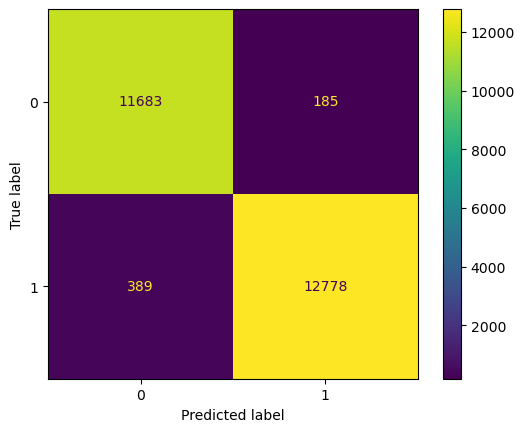

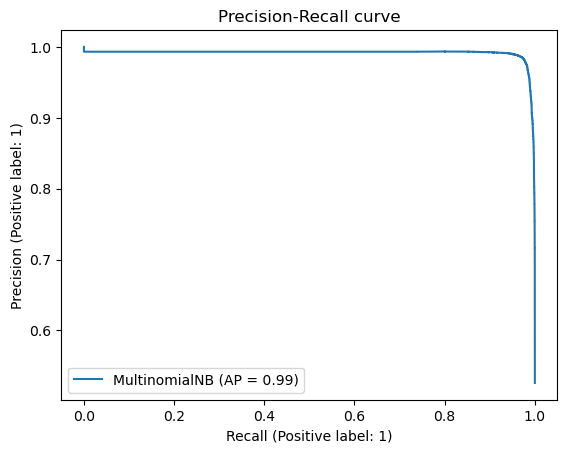

In [16]:
# Predicting values
y_pred = model.predict(x_test)
# Preformance metrics and confusion matrix
print_performance_metrics(y_test, y_pred, model, x_test)

## Predictions

In [17]:
new_emails = np.array(["loading the model and making predictions",
       "you won a lottery !", "Nothing is permanent", 
        "hello, want a job ?", "We have a meeting next Monday" ])

new_emails_vectorized = vectorizer.transform(new_emails)
model.predict(new_emails_vectorized)

array([0, 1, 1, 1, 0])